In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

In [2]:
turnip_data = pd.read_csv('../Database/stonksData.csv')

In [3]:
turnip_data.head()

,Buy Price,Mon AM,Mon PM,Tue AM,Tue PM,Wed AM,Wed PM,Thu AM,Thu PM,Fri AM,Fri PM,Sat AM,Sat PM,Previous Pattern,Pattern
0,NaN,126.0,94.0,107.0,71.0,64.0,146.0,146.0,76.0,70.0,66.0,146.0,146.0,2,0.0
1,NaN,126.0,94.0,107.0,71.0,64.0,53.0,90.0,76.0,70.0,90.0,90.0,90.0,2,0.0
2,NaN,126.0,94.0,107.0,71.0,64.0,53.0,146.0,76.0,70.0,94.0,146.0,146.0,2,0.0
3,NaN,126.0,94.0,107.0,71.0,64.0,53.0,146.0,76.0,70.0,94.0,94.0,94.0,2,0.0
4,107.0,93.0,88.0,85.0,80.0,118.0,208.0,600.0,166.0,100.0,90.0,72.0,97.0,0,2.0


Pattern definition: 
    0: Fluctuating
    1: Small Spike
    2: Large Spike
    3: Decreasing
    4: Unknown

In [4]:
turnip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buy Price         245 non-null    float64
 1   Mon AM            249 non-null    float64
 2   Mon PM            253 non-null    float64
 3   Tue AM            247 non-null    float64
 4   Tue PM            251 non-null    float64
 5   Wed AM            245 non-null    float64
 6   Wed PM            235 non-null    float64
 7   Thu AM            229 non-null    float64
 8   Thu PM            215 non-null    float64
 9   Fri AM            186 non-null    float64
 10  Fri PM            164 non-null    float64
 11  Sat AM            143 non-null    float64
 12  Sat PM            129 non-null    float64
 13  Previous Pattern  258 non-null    int64  
 14  Pattern           255 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 30.4 KB


In [5]:
turnip_data.isnull().sum()

Buy Price            13
Mon AM                9
Mon PM                5
Tue AM               11
Tue PM                7
Wed AM               13
Wed PM               23
Thu AM               29
Thu PM               43
Fri AM               72
Fri PM               94
Sat AM              115
Sat PM              129
Previous Pattern      0
Pattern               3
dtype: int64

We can see there are 3 rows with no label. Those are to be extracted from the dataset.

In [6]:
nonLabeled = turnip_data[turnip_data['Pattern'].isnull()]
nonLabeled.head()

,Buy Price,Mon AM,Mon PM,Tue AM,Tue PM,Wed AM,Wed PM,Thu AM,Thu PM,Fri AM,Fri PM,Sat AM,Sat PM,Previous Pattern,Pattern
15,104.0,94.0,89.0,85.0,80.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
53,103.0,90.0,85.0,71.0,76.0,72.0,69.0,66.0,125.0,156.0,NaN,NaN,NaN,0,NaN
54,110.0,99.0,94.0,91.0,87.0,82.0,79.0,NaN,149.0,166.0,NaN,NaN,NaN,0,NaN


As the amount of feature data they contain is quite enough. Those are going to be saved for later testing

In [7]:
df = turnip_data[turnip_data['Pattern'].notnull()]
df.isnull().sum()

Buy Price            13
Mon AM                9
Mon PM                5
Tue AM               11
Tue PM                7
Wed AM               13
Wed PM               22
Thu AM               27
Thu PM               42
Fri AM               71
Fri PM               91
Sat AM              112
Sat PM              126
Previous Pattern      0
Pattern               0
dtype: int64

Now the data is completely labeled

In [8]:
pattern_classes = ['Fluctuating', 'Small Spike', 'Large Spike', 'Decreasing']
pattern_label   = 'Pattern'
pattern_feature = list(df.columns[df.columns != 'Pattern'])

In [9]:
df = df.fillna(0)
df.isna().sum()

Buy Price           0
Mon AM              0
Mon PM              0
Tue AM              0
Tue PM              0
Wed AM              0
Wed PM              0
Thu AM              0
Thu PM              0
Fri AM              0
Fri PM              0
Sat AM              0
Sat PM              0
Previous Pattern    0
Pattern             0
dtype: int64

### Preparing the data

In [50]:
df_X, df_y = df[pattern_feature].values, df[pattern_label].values
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_y)
print ('Training Set: %d, Test Set: %d \n' % (X_train.shape[0], X_test.shape[0]))

Training Set: 178, Test Set: 77 



## Training the model

### Support Vector Machine

In [11]:
from sklearn.svm import LinearSVC

svc_Model = LinearSVC(random_state=0, tol=1e-5, max_iter=1000000)
svc_Model.fit(X_train, y_train)

C:\Users\cresp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=1000000, random_state=0, tol=1e-05)

In [12]:
predictions = svc_Model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

from sklearn.metrics import precision_score, recall_score
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Predicted labels:  [0. 1. 1. 2. 0. 0. 0. 2. 2. 1. 0. 0. 3. 2. 1. 0. 0. 1. 2. 0. 2. 1. 0. 1.
 2. 2. 1. 0. 0. 0. 1. 2. 0. 0. 1. 1. 0. 1. 0. 2. 1. 2. 2. 2. 0. 0. 2. 1.
 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 1. 0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 0.
 2. 0. 1. 0. 2.]
Actual labels:     [0. 2. 1. 2. 0. 2. 0. 0. 2. 3. 0. 0. 3. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2.
 0. 2. 3. 3. 0. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 2.
 0. 1. 0. 3. 0. 3. 2. 0. 3. 1. 1. 3. 2. 0. 0. 0. 1. 2. 0. 3. 1. 2. 1. 0.
 2. 3. 1. 0. 2.]
Accuracy:  0.6233766233766234
              precision    recall  f1-score   support

         0.0       0.64      0.92      0.75        25
         1.0       0.53      0.48      0.50        21
         2.0       0.67      0.67      0.67        21
         3.0       1.00      0.10      0.18        10

    accuracy                           0.62        77
   macro avg       0.71      0.54      0.53        77
weighted avg       0.66      0.62      0.59        77

Overall Precision: 0.7079

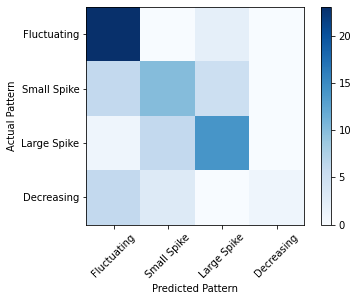

In [13]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

## Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [15]:
neigh_pred = neigh.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

print('Accuracy: ', accuracy_score(y_test, neigh_pred))

print(classification_report(y_test, neigh_pred))
print("Overall Precision:",precision_score(y_test, neigh_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, neigh_pred, average='macro'))

Predicted labels:  [0. 1. 1. 2. 0. 0. 0. 2. 2. 1. 0. 0. 3. 2. 1. 0. 0. 1. 2. 0. 2. 1. 0. 1.
 2. 2. 1. 0. 0. 0. 1. 2. 0. 0. 1. 1. 0. 1. 0. 2. 1. 2. 2. 2. 0. 0. 2. 1.
 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 1. 0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 0.
 2. 0. 1. 0. 2.]
Actual labels:     [0. 2. 1. 2. 0. 2. 0. 0. 2. 3. 0. 0. 3. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2.
 0. 2. 3. 3. 0. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 2.
 0. 1. 0. 3. 0. 3. 2. 0. 3. 1. 1. 3. 2. 0. 0. 0. 1. 2. 0. 3. 1. 2. 1. 0.
 2. 3. 1. 0. 2.]
Accuracy:  0.7402597402597403
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75        25
         1.0       0.62      0.76      0.68        21
         2.0       1.00      0.62      0.76        21
         3.0       0.67      1.00      0.80        10

    accuracy                           0.74        77
   macro avg       0.77      0.78      0.75        77
weighted avg       0.78      0.74      0.74        77

Overall Precision: 0.7661

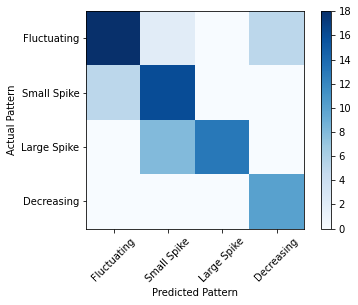

In [16]:
# Print the confusion matrix
mcm = confusion_matrix(y_test, neigh_pred)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

Predicted labels:  [0. 1. 1. 2. 0. 0. 0. 2. 2. 1. 0. 0. 3. 2. 1. 0. 0. 1. 2. 0. 2. 1. 0. 1.
 2. 2. 1. 0. 0. 0. 1. 2. 0. 0. 1. 1. 0. 1. 0. 2. 1. 2. 2. 2. 0. 0. 2. 1.
 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 1. 0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 0.
 2. 0. 1. 0. 2.]
Actual labels:     [0. 2. 1. 2. 0. 2. 0. 0. 2. 3. 0. 0. 3. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2.
 0. 2. 3. 3. 0. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 2.
 0. 1. 0. 3. 0. 3. 2. 0. 3. 1. 1. 3. 2. 0. 0. 0. 1. 2. 0. 3. 1. 2. 1. 0.
 2. 3. 1. 0. 2.]
Accuracy:  0.7532467532467533
              precision    recall  f1-score   support

         0.0       0.84      0.64      0.73        25
         1.0       0.64      0.86      0.73        21
         2.0       1.00      0.67      0.80        21
         3.0       0.62      1.00      0.77        10

    accuracy                           0.75        77
   macro avg       0.78      0.79      0.76        77
weighted avg       0.80      0.75      0.75        77

Overall Precision: 0.7774

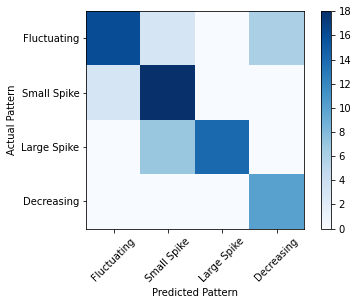

In [26]:
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train, y_train)
neigh5_pred = neigh5.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

print('Accuracy: ', accuracy_score(y_test, neigh5_pred))

print(classification_report(y_test, neigh5_pred))
print("Overall Precision:",precision_score(y_test, neigh5_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, neigh5_pred, average='macro'))
mcm = confusion_matrix(y_test, neigh5_pred)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

forestClass = RandomForestClassifier(n_estimators=100)
forestClass.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
forest_pred = forestClass.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

print('Accuracy: ', accuracy_score(y_test, forest_pred))

print(classification_report(y_test, forest_pred))
print("Overall Precision:",precision_score(y_test, forest_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, forest_pred, average='macro'))

Predicted labels:  [0. 1. 1. 2. 0. 0. 0. 2. 2. 1. 0. 0. 3. 2. 1. 0. 0. 1. 2. 0. 2. 1. 0. 1.
 2. 2. 1. 0. 0. 0. 1. 2. 0. 0. 1. 1. 0. 1. 0. 2. 1. 2. 2. 2. 0. 0. 2. 1.
 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 1. 0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 1. 0.
 2. 0. 1. 0. 2.]
Actual labels:     [0. 2. 1. 2. 0. 2. 0. 0. 2. 3. 0. 0. 3. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 2.
 0. 2. 3. 3. 0. 0. 1. 1. 0. 1. 1. 2. 1. 1. 0. 1. 2. 1. 2. 2. 0. 0. 2. 2.
 0. 1. 0. 3. 0. 3. 2. 0. 3. 1. 1. 3. 2. 0. 0. 0. 1. 2. 0. 3. 1. 2. 1. 0.
 2. 3. 1. 0. 2.]
Accuracy:  0.8701298701298701
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        25
         1.0       0.83      0.71      0.77        21
         2.0       0.83      0.95      0.89        21
         3.0       0.91      1.00      0.95        10

    accuracy                           0.87        77
   macro avg       0.87      0.89      0.88        77
weighted avg       0.87      0.87      0.87        77

Overall Precision: 0.8731

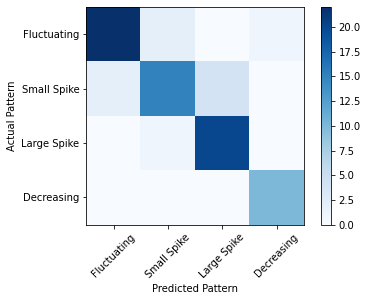

In [33]:
# Print the confusion matrix
mcm = confusion_matrix(y_test, forest_pred)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

Save the models

In [20]:
import joblib

# Save the model as a pickle file
filename = './models/forest_model.pkl'
#joblib.dump(forestClass, filename)

filename = './models/Kneigh_model.pkl'
#joblib.dump(neigh, filename)

In [21]:
forestClass.predict_proba(X_test[0:1])

array([[0.67, 0.18, 0.15, 0.  ]])

# PYTORCH CLASSIFICATION USING DEEP LEARNING

In [62]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

In [51]:
Xtrain = torch.from_numpy(X_train).float()
Xtest = torch.from_numpy(X_test).float()

In [52]:
Ytrain = torch.from_numpy(y_train).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test).view(1, -1)[0].long()

In [58]:
input_size = Xtrain.shape[1]
output_size = len(df[pattern_label].unique())

In [61]:
class ClassificationNet(nn.Module):
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False):
        super(ClassificationNet, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activation_fn

        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        activation_fn = None
        if self.activation_fn == 'sigmoid':
            activation_fn = F.torch.sigmoid
        elif self.activation_fn == 'tanh':
            activation_fn = F.torch.tanh
        elif self.activation_fn == 'relu':
            activation_fn = F.torch.relu
        
        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))

        if self.dropout != None:
            x = self.dropout(x)
        
        x = self.fc3(x)
        return F.log_softmax(x, dim = -1)
        

In [94]:
def train_and_evaluate_model(model, learn_rate=0.001):
    epoch_data = []
    epochs = 1001

    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    loss_fn = nn.NLLLoss()

    test_accuracy = 0.0

    for epoch in range(1, epochs):

        optimizer.zero_grad()

        model.train()

        Ypred = model(Xtrain)

        loss = loss_fn(Ypred, Ytrain)
        loss.backward()

        optimizer.step()

        model.eval()

        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)

        _, pred = Ypred_test.data.max(1)

        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.size

        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

        if epoch % 100 == 0:
            print('epoch -%d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                % (epoch, epoch/150 * 10, loss.data.item(),
                loss_test.data.item(), test_accuracy))

    return {'model':model, 'epoch_data': epoch_data, 'num_epochs':epochs, 'optimizer': optimizer,
            'loss_fn':loss_fn, 'test_accuracy':test_accuracy, '_,pred': Ypred_test.data.max(1),'actual_test_label':Ytest}

In [74]:
net = ClassificationNet(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)
net

ClassificationNet(
  (fc1): Linear(in_features=14, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=4, bias=True)
)

In [75]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch -1000 (66%) train loss - 1.16 test loss - 1.25 Test accuracy - 0.4805
epoch -2000 (133%) train loss - 1.07 test loss - 1.17 Test accuracy - 0.4805
epoch -3000 (200%) train loss - 1.05 test loss - 1.17 Test accuracy - 0.4805
epoch -4000 (266%) train loss - 1.03 test loss - 1.20 Test accuracy - 0.4675
epoch -5000 (333%) train loss - 1.01 test loss - 1.23 Test accuracy - 0.4286
epoch -6000 (400%) train loss - 1.00 test loss - 1.22 Test accuracy - 0.4416
epoch -7000 (466%) train loss - 0.93 test loss - 1.22 Test accuracy - 0.4675
epoch -8000 (533%) train loss - 0.92 test loss - 1.56 Test accuracy - 0.4805
epoch -9000 (600%) train loss - 0.91 test loss - 1.60 Test accuracy - 0.4805
epoch -10000 (666%) train loss - 0.90 test loss - 1.67 Test accuracy - 0.4675


In [76]:
net = ClassificationNet(hidden_size=3, activation_fn='sigmoid', apply_dropout=True)
net

ClassificationNet(
  (fc1): Linear(in_features=14, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [77]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch -1000 (66%) train loss - 1.25 test loss - 1.26 Test accuracy - 0.3636
epoch -2000 (133%) train loss - 1.10 test loss - 1.15 Test accuracy - 0.4026
epoch -3000 (200%) train loss - 1.02 test loss - 1.13 Test accuracy - 0.4156
epoch -4000 (266%) train loss - 0.99 test loss - 1.11 Test accuracy - 0.4156
epoch -5000 (333%) train loss - 0.98 test loss - 1.10 Test accuracy - 0.4156
epoch -6000 (400%) train loss - 0.95 test loss - 1.08 Test accuracy - 0.3896
epoch -7000 (466%) train loss - 0.99 test loss - 1.08 Test accuracy - 0.4286
epoch -8000 (533%) train loss - 1.03 test loss - 1.07 Test accuracy - 0.4935
epoch -9000 (600%) train loss - 0.95 test loss - 1.06 Test accuracy - 0.4935
epoch -10000 (666%) train loss - 0.96 test loss - 1.07 Test accuracy - 0.4805


In [78]:
net = ClassificationNet(hidden_size=50, activation_fn='tanh')
net

ClassificationNet(
  (fc1): Linear(in_features=14, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=4, bias=True)
)

In [79]:
result_50_tanh = train_and_evaluate_model(net)

epoch -1000 (66%) train loss - 0.00 test loss - 1.88 Test accuracy - 0.7143
epoch -2000 (133%) train loss - 0.00 test loss - 2.28 Test accuracy - 0.7273
epoch -3000 (200%) train loss - 0.00 test loss - 2.48 Test accuracy - 0.7273
epoch -4000 (266%) train loss - 0.00 test loss - 2.65 Test accuracy - 0.7273
epoch -5000 (333%) train loss - 0.00 test loss - 2.80 Test accuracy - 0.7403
epoch -6000 (400%) train loss - 0.00 test loss - 2.82 Test accuracy - 0.7273
epoch -7000 (466%) train loss - 0.00 test loss - 2.92 Test accuracy - 0.7273
epoch -8000 (533%) train loss - 0.00 test loss - 3.02 Test accuracy - 0.7273
epoch -9000 (600%) train loss - 0.00 test loss - 3.11 Test accuracy - 0.7273
epoch -10000 (666%) train loss - 0.00 test loss - 3.16 Test accuracy - 0.7273


In [80]:
net = ClassificationNet(hidden_size=1000, activation_fn='tanh')
net

ClassificationNet(
  (fc1): Linear(in_features=14, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=4, bias=True)
)

In [81]:
result_1000_tanh = train_and_evaluate_model(net)

epoch -1000 (66%) train loss - 0.00 test loss - 0.87 Test accuracy - 0.8182
epoch -2000 (133%) train loss - 0.00 test loss - 0.94 Test accuracy - 0.8182
epoch -3000 (200%) train loss - 0.00 test loss - 0.99 Test accuracy - 0.8182
epoch -4000 (266%) train loss - 0.00 test loss - 1.04 Test accuracy - 0.8182
epoch -5000 (333%) train loss - 0.00 test loss - 1.08 Test accuracy - 0.8182
epoch -6000 (400%) train loss - 0.00 test loss - 1.12 Test accuracy - 0.8182
epoch -7000 (466%) train loss - 0.00 test loss - 1.16 Test accuracy - 0.8182
epoch -8000 (533%) train loss - 0.00 test loss - 1.20 Test accuracy - 0.8182
epoch -9000 (600%) train loss - 0.00 test loss - 1.24 Test accuracy - 0.8182
epoch -10000 (666%) train loss - 0.00 test loss - 1.28 Test accuracy - 0.8182


In [82]:
net = ClassificationNet(hidden_size=1000, activation_fn='tanh', apply_dropout=True)
net

ClassificationNet(
  (fc1): Linear(in_features=14, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [83]:
result_1000_tanh = train_and_evaluate_model(net)

epoch -1000 (66%) train loss - 0.00 test loss - 0.85 Test accuracy - 0.8312
epoch -2000 (133%) train loss - 0.00 test loss - 0.94 Test accuracy - 0.8312
epoch -3000 (200%) train loss - 0.00 test loss - 0.99 Test accuracy - 0.8312
epoch -4000 (266%) train loss - 0.00 test loss - 1.04 Test accuracy - 0.8312
epoch -5000 (333%) train loss - 0.00 test loss - 1.08 Test accuracy - 0.8182
epoch -6000 (400%) train loss - 0.00 test loss - 1.12 Test accuracy - 0.8182
epoch -7000 (466%) train loss - 0.00 test loss - 1.15 Test accuracy - 0.8182
epoch -8000 (533%) train loss - 0.00 test loss - 1.18 Test accuracy - 0.8182
epoch -9000 (600%) train loss - 0.00 test loss - 1.21 Test accuracy - 0.8182
epoch -10000 (666%) train loss - 0.00 test loss - 1.24 Test accuracy - 0.8182


In [84]:
net = ClassificationNet(hidden_size=100, activation_fn='sigmoid', apply_dropout=True)
net

ClassificationNet(
  (fc1): Linear(in_features=14, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [85]:
result_100_sigmoid = train_and_evaluate_model(net)

epoch -1000 (66%) train loss - 0.00 test loss - 0.81 Test accuracy - 0.8182
epoch -2000 (133%) train loss - 0.00 test loss - 0.93 Test accuracy - 0.8312
epoch -3000 (200%) train loss - 0.00 test loss - 1.05 Test accuracy - 0.8182
epoch -4000 (266%) train loss - 0.00 test loss - 1.15 Test accuracy - 0.8182
epoch -5000 (333%) train loss - 0.00 test loss - 1.23 Test accuracy - 0.8052
epoch -6000 (400%) train loss - 0.00 test loss - 1.31 Test accuracy - 0.8052
epoch -7000 (466%) train loss - 0.00 test loss - 1.38 Test accuracy - 0.8182
epoch -8000 (533%) train loss - 0.00 test loss - 1.44 Test accuracy - 0.8052
epoch -9000 (600%) train loss - 0.00 test loss - 1.52 Test accuracy - 0.8052
epoch -10000 (666%) train loss - 0.00 test loss - 1.56 Test accuracy - 0.7922


In [95]:
net = ClassificationNet(hidden_size=100, activation_fn='relu', apply_dropout=True)
net
result_100_relu = train_and_evaluate_model(net)

epoch -100 (6%) train loss - 0.15 test loss - 0.63 Test accuracy - 0.7662
epoch -200 (13%) train loss - 0.08 test loss - 0.72 Test accuracy - 0.8052
epoch -300 (20%) train loss - 0.03 test loss - 0.75 Test accuracy - 0.8052
epoch -400 (26%) train loss - 0.01 test loss - 0.80 Test accuracy - 0.8571
epoch -500 (33%) train loss - 0.01 test loss - 0.81 Test accuracy - 0.8442
epoch -600 (40%) train loss - 0.01 test loss - 0.90 Test accuracy - 0.8442
epoch -700 (46%) train loss - 0.01 test loss - 0.90 Test accuracy - 0.8701
epoch -800 (53%) train loss - 0.01 test loss - 0.97 Test accuracy - 0.8831
epoch -900 (60%) train loss - 0.00 test loss - 0.99 Test accuracy - 0.8442
epoch -1000 (66%) train loss - 0.00 test loss - 0.96 Test accuracy - 0.8701


In [96]:
result_model = result_100_relu
df_epochs_data = pd.DataFrame(result_model['epoch_data'],
                            columns=["epoch", "train_loss", "test_loss", "accuracy"])

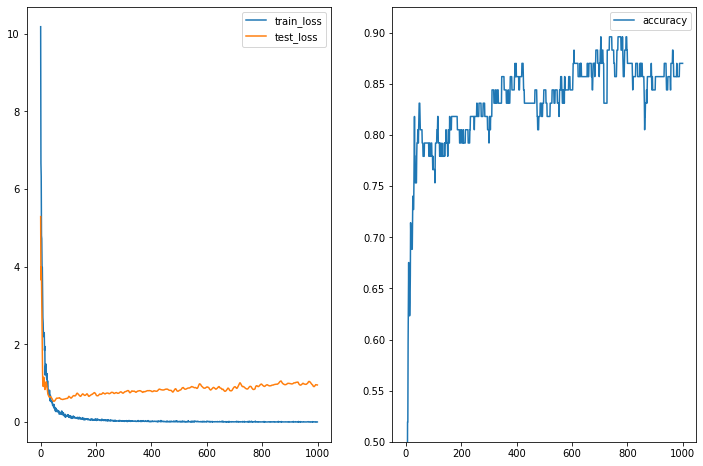

In [97]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)
plt.show()

In [ ]:
net.eval()
Ypred_test = net(Xtest)
print(classification_report(y_test, forest_pred))
print("Overall Precision:",precision_score(y_test, forest_pred, average='macro'))
print("Overall Recall:",recall_score(y_test, forest_pred, average='macro'))

In [98]:
net.eval()
Ypred_test = net(Xtest)

In [108]:
_, pred = Ypred_test.data.max(1)
Ypred_test_numpy = pred.detach().numpy()

In [109]:
print(classification_report(y_test, Ypred_test_numpy))
print("Overall Precision:",precision_score(y_test, Ypred_test_numpy, average='macro'))
print("Overall Recall:",recall_score(y_test, Ypred_test_numpy, average='macro'))

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        25
         1.0       0.78      0.86      0.82        21
         2.0       0.86      0.90      0.88        21
         3.0       0.83      1.00      0.91        10

    accuracy                           0.87        77
   macro avg       0.87      0.89      0.87        77
weighted avg       0.88      0.87      0.87        77

Overall Precision: 0.8698945981554678
Overall Recall: 0.8904761904761904


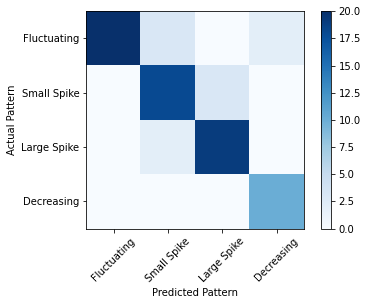

In [110]:
# Print the confusion matrix
mcm = confusion_matrix(y_test, Ypred_test_numpy)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

In [115]:
class ComplexClassificationNet(nn.Module):
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False):
        super(ComplexClassificationNet, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activation_fn

        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        activation_fn = None
        if self.activation_fn == 'sigmoid':
            activation_fn = F.torch.sigmoid
        elif self.activation_fn == 'tanh':
            activation_fn = F.torch.tanh
        elif self.activation_fn == 'relu':
            activation_fn = F.torch.relu
        
        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))
        x = activation_fn(self.fc3(x))

        if self.dropout != None:
            x = self.dropout(x)
        
        x = self.fc4(x)
        return F.log_softmax(x, dim = -1)

In [140]:
net = ComplexClassificationNet(hidden_size=264, activation_fn='relu', apply_dropout=True)
net
result_128_relu = train_and_evaluate_model(net)

epoch -100 (6%) train loss - 0.01 test loss - 0.73 Test accuracy - 0.8312
epoch -200 (13%) train loss - 0.00 test loss - 0.91 Test accuracy - 0.8701
epoch -300 (20%) train loss - 0.00 test loss - 0.96 Test accuracy - 0.8831
epoch -400 (26%) train loss - 0.00 test loss - 1.09 Test accuracy - 0.8831
epoch -500 (33%) train loss - 0.00 test loss - 1.08 Test accuracy - 0.8571
epoch -600 (40%) train loss - 0.00 test loss - 1.23 Test accuracy - 0.8701
epoch -700 (46%) train loss - 0.00 test loss - 1.21 Test accuracy - 0.8701
epoch -800 (53%) train loss - 0.00 test loss - 1.29 Test accuracy - 0.8701
epoch -900 (60%) train loss - 0.00 test loss - 1.27 Test accuracy - 0.8701
epoch -1000 (66%) train loss - 0.00 test loss - 1.34 Test accuracy - 0.8701


In [141]:
result_model = result_64_relu
df_epochs_data = pd.DataFrame(result_model['epoch_data'],
                            columns=["epoch", "train_loss", "test_loss", "accuracy"])

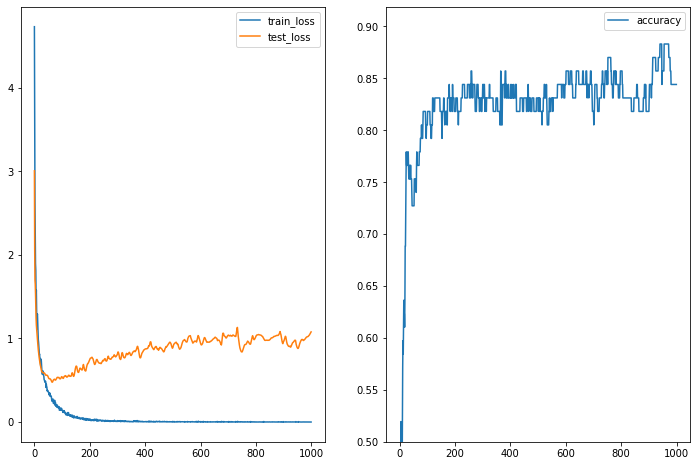

In [142]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)
plt.show()

In [143]:
net.eval()
Ypred_test = net(Xtest)

In [144]:
_, pred = Ypred_test.data.max(1)
Ypred_test_numpy = pred.detach().numpy()

In [145]:
print(classification_report(y_test, Ypred_test_numpy))
print("Overall Precision:",precision_score(y_test, Ypred_test_numpy, average='macro'))
print("Overall Recall:",recall_score(y_test, Ypred_test_numpy, average='macro'))

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85        25
         1.0       0.90      0.86      0.88        21
         2.0       0.90      0.90      0.90        21
         3.0       0.71      1.00      0.83        10

    accuracy                           0.87        77
   macro avg       0.86      0.89      0.87        77
weighted avg       0.88      0.87      0.87        77

Overall Precision: 0.857034632034632
Overall Recall: 0.8904761904761904


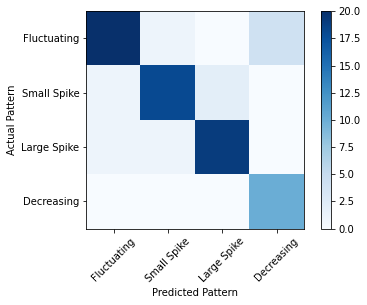

In [146]:
# Print the confusion matrix
mcm = confusion_matrix(y_test, Ypred_test_numpy)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(pattern_classes))
plt.xticks(tick_marks, pattern_classes, rotation=45)
plt.yticks(tick_marks, pattern_classes)
plt.xlabel("Predicted Pattern")
plt.ylabel("Actual Pattern")
plt.show()

NameError: name 'net' is not defined